In [31]:
from numpy.random import seed
from numpy.random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import string, random

For this exercise, we will be comparing search times on various data structures. To begin, we will create our first data structure: a simple array of 100,000 different random strings (all with a length of 10 characters). 

In [32]:
#Create the series of 100,000 different random names
series = np.array([])

while len(series) <= 100000:
    series = np.append(series, ''.join(random.sample(string.ascii_lowercase,10)).capitalize())

    
#Make sure there are no duplicates
def contains_duplicates(X):
    return len(np.unique(X)) != len(X)

contains_duplicates(series)

False

Now we want to store the list of random generated names in a set  (https://docs.python.org/3.7/library/stdtypes.html).

In [33]:
names_set = set(series)

With that completed, we will now make a seperate copy of the list and sort it using any of the sorting algorithms that we have learned so far. For this exercise, I am using the simple sort function that is native to the numpy library. In our research from Assignment 2, we learned that the numpy built-in sort function was the fastest in terms of milliseconds.

In [34]:
#Sort using numpy sort function
start = time.perf_counter()
names_srt = np.sort(series)
stop = time.perf_counter()
srttime = (stop - start)

Now we will pick the names from the unsorted array that are at the 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.

In [35]:
#Since we're selecting by position, not index, we'll subtract 1 from each
IndexPos = [9999,29999,49999,69999, 89999, 99999] 
PickNames = np.take(series, IndexPos)
PickNames

array(['Lnjuvbsyco', 'Newjytsafh', 'Gltrswizop', 'Wqijvcfhde',
       'Ocysagvhnu', 'Fvaqjkyznu'], dtype='<U32')

Next we will search for these six names in each of the collections.  For the unsorted list we will be using a linear search, for the sorted list we will use the binary search, and we will use the in keyword builtin for the set.  

In [36]:
# For the linear search, we first have to create the function
def search(arr, x): 

    for i in range(len(arr)): 

        if arr[i] == x: 
            return i 

    return -1

# We will run this search 1000 times and take the average for the time
start = time.perf_counter()
for i in range(1000):
    for term in PickNames:
        answer = search(series, term)
stop = time.perf_counter()
SimpleSearchTime = (stop - start)/1000

SimpleSearchTime

0.12416179889999966

In [37]:
#For the Binary Search, we first have to create the function

def binarySearch(list, item):
    low = 0
    high = len(list) - 1
    
    while low <= high:
        mid = (low + high)
        guess = list[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    return None

# We will run this search 1000 times and take the average for the time
start = time.perf_counter()
for i in range(1000):
    for item in PickNames:
        binarySearch(names_srt, item)
stop = time.perf_counter()

BinarySearchTime = (stop - start)/1000

BinarySearchTime

0.16213588399999934

In [38]:
# For the set search, we will use the IN keyword builtin for the set. Again, we will run this 1000 times.
start = time.perf_counter()
for i in range(1000):
    [x for x in PickNames if x in names_set]
stop = time.perf_counter()

SetSearchTime = (stop - start)/1000

SetSearchTime

2.764500000012049e-06

With that finished, we will now store the results in a table to report on and will visualize the results in a graph.

In [46]:
df_results = pd.DataFrame(np.array([['Sort Method', 'Time'],
                     ['Linear Search', round(SimpleSearchTime,6)],
                     ['Binary Search', round(BinarySearchTime,6)],
                     ['Set Search', round(SetSearchTime,6)]]))

print("Measuring Search Performance, in milliseconds:")
df_results

Measuring Search Performance, in milliseconds:


,0,1
0,Sort Method,Time
1,Linear Search,0.124162
2,Binary Search,0.162136
3,Set Search,3e-06


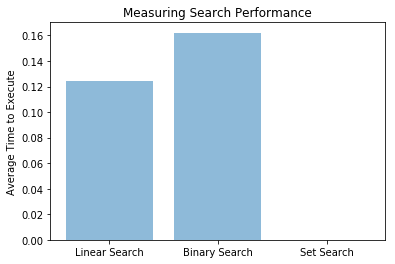

In [40]:
objects = ('Linear Search', 'Binary Search', 'Set Search')
y_pos = np.arange(len(objects))
performance = [SimpleSearchTime,BinarySearchTime, SetSearchTime]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Time to Execute')
plt.title('Measuring Search Performance')
plt.style.use('seaborn-colorblind')
 
plt.show()

Executive Summary:

In this exercise we compared search times on various data structures using differing algorithms. To test these searches out, we generated a list of 100,000 random names and then performed the searches on these lists. We stored the list of names in an unsorted and a sorted array, along with using the set format hash table. 

With that finished, we then performed our searching algorithms on the different data structures. For the unsorted array, we used a linear search. For the sorted array we used a binary search. Finally for the set, we used the builtin function in the set. 

The results above and the graph show just how powerful the hash table was in searching. Since hash table structures map the names to a number value, performing a search task on that number value is extremely quick to complete. Thus, if a search needs to be performed on stored data, we recommend using hash tables to store the data before performing the search.